Example: Loan Default prediction - categorical data

* Main objective: Prediction of labels

* Binary classification and multiclass classification

Methods of Supervised Learning for classification

* Decision Trees
* Naive Bayes
* Linear Discriminant Analysis
* K nearest neighbours
* Logistic Regression
* Neural Networks
* Support Vector Machine (SVM)

# KNN

## General purpose

* Classify cases based in their similarity (proximity) to other cases.
* Cases that are near each other are said to be "neighbours"
* Based on the paradigm (assortativity - complex network theory) that "similar cases with same class label are near each other".

## Overview of algorithm

1. Pick a value for K
2. Claculate the distance of unknown case from all cases
3. Select the k-observations in the training set that are the "nearest" to the unknown data point
4. Predict the class of the unknown datapoint using the most popular response value from the K-nearest neighbours.

## FAQ's

1. How to pick k?

> If we use low k(=1), this might be a bad prediction of points around that neighbour have another value in common. This means prediction may pick values from outliers or an anomaly in the data. 

STATEMENT: We want a general model that works for any data, not only the data used for training. 

> If we use high k(=20, e.g), the model becomes __overlly generalised__. 

> General solution: Compute accuracy for several k values and find the value for which accuracy peaks. 

2. How to calculate the similarity betwen two data points?

> A: Can use the plain Euclidean distance to the high-dim vector of features.

## Continuous target variables

* Take average value from neighbours

## Evaluation metrics for classifiers

STATEMENT: "EM explain the performance of a model"

Can be used for multiclass classifiers.

* _Jaccard Index_ or Jaccard Similarity Coefficient

$$
J(Y, \hat{Y}) = \frac{|Y \cap \hat{Y}|}{|Y \cup \hat{Y}|}
$$

similarity between predicted and true sets of label.

<span style="color:green">ALL CLEAR</span>

* _F1-score_

Have a look at a _confussion matrix_ to help us visualize accuracy of our model prediction.

$$Precision = TP/(TP+FP)$$
$$Recall = TP/(TP+FN)$$
$$F1-score = 2x(Precision * Recall)/(Precision + Recall)$$

__What the difference between Recall and Precision?__

Average accuracy = Average F1-score

<span style="color:red">NOT CLEAR</span>

* Log loss

Used when predicted value is a probability associated to a label.

High accuracy = Low log loss

<span style="color:red">NOT CLEAR</span>

# Practical

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv('teleCust1000t.csv')

Let's have a look at the content of the dataset

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Let's find out how many observations per each value of the feature `custcat`

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Can visualise distribution of values per variable or _feature_

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

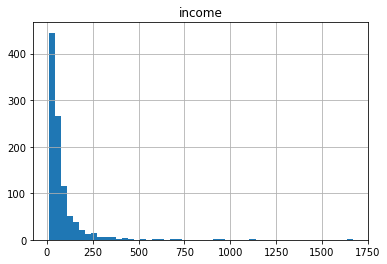

In [7]:
df.hist(column='income', bins=50)

Let's have a look at the __feature set__

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

We convert every observation into an n-dimensional array and hence, the whole dataset becomes a 1D-array

In [18]:
X = df[list(df.columns)].values
X

array([[ 2., 13., 44., ...,  0.,  2.,  1.],
       [ 3., 11., 33., ...,  0.,  6.,  4.],
       [ 3., 68., 52., ...,  1.,  2.,  3.],
       ...,
       [ 3., 67., 59., ...,  1.,  1.,  4.],
       [ 3., 70., 49., ...,  1.,  1.,  3.],
       [ 3., 50., 36., ...,  1.,  3.,  2.]])

In [19]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

Let's get the set of values of the target output (customer service).

In [24]:
y = df['custcat'].values

In [26]:
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize data

It's good practice to normalise your data, so that it has zero mean and unit variance.

Specially for classification algorithms such as Knn based on distance between data points.

In [36]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [37]:
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601, ...,  0.96655883,
        -0.23065004,  0.45813963],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ...,  0.96655883,
        -0.92747794,  1.35119935],
       [ 1.19883553,  1.61477311,  0.58283046, ...,  0.96655883,
        -0.92747794,  0.45813963],
       [ 1.19883553,  0.67796676, -0.45281689, ...,  0.96655883,
         0.46617787, -0.43492008]])

<span style="color:blue">CONCEPT</span>

_Out-sample accuracy_ It's the percentage of corrected predictions that the model can make on the data that the model has NOT been trained on. 

__Train/Test split__ Involves splitting the dataset into train and test sets which are mutually exclusive to guarantee high out-of-sample accuracy, as opposed to overfitting - when sets overlap.

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


What's `random_state`?

From [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) : Controls the shuffling applied to the data before applying the split.

## K-nearest neighbors (Provided example)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

__Training__

Let's start with $k = 4$

In [44]:
k = 4
classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

__Prediction__

In [45]:
y_hat = classifier.predict(X_test)

In [47]:
y_hat[0:5]

array([3, 1, 1, 2, 4])

__Accuracy evaluation__

In [49]:
from sklearn import metrics

This __accuracy score__ is equivalent to the _Jaccard index_ to test how closely predicted labels are close to true labels in the test set.

In [52]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, classifier.predict(X_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


This indicates the presence of overfitting. 

## Practice

Repeat the above but with 6 neighbours

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [57]:
k = 6
classifier = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

In [61]:
accuracy_score(classifier.predict(X_test), y_test)

0.755

NOTE: With $k=6$ the test set accuracy increased slightly. 

Now let's study how the accuracy score depends on k, and whether it peaks at some preferential k value.

In [78]:
jaccard = []
jaccard_std = []
k_min = 1
k_max = 20

for k in range(k_min, k_max):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_hat = classifier.predict(X_test)
    # append score
    j_score = accuracy_score(y_hat, y_test)
    jaccard.append(j_score)
    #append score std
    j_score_std = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    jaccard_std.append(j_score_std)
    
jaccard = np.asarray(jaccard)
jaccard_std = np.asarray(jaccard_std)

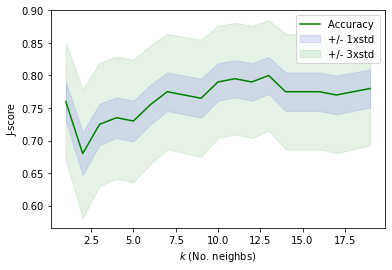

In [82]:
fig = plt.figure()
plt.plot(list(range(k_min,k_max)), jaccard, color='green')
plt.fill_between(range(k_min,k_max), jaccard - 1*jaccard_std, jaccard + 1*jaccard_std, color="blue",alpha=0.10)
plt.fill_between(range(k_min,k_max), jaccard - 3*jaccard_std, jaccard + 3*jaccard_std, color="green",alpha=0.10)
plt.xlabel("$k$ (No. neighbs)")
plt.ylabel("J-score")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))s

In [75]:
print("The best accuracy was ", jaccard.max(), "with k = ", jaccard.argmax())

The best accuracy was  0.8 with k =  12


# Decision Trees

## Intro to decision tree

Statement "The basic intuition behind decision trees is to map out all possible decision paths in the form of a tree"

STATEMENT: Decision trees are about testing an attribute and branching the cases based on the result of the test. 

* Each internal node corresponds to a test.
* Each branch corresponds to a results of the tests. 
* Each leave node assigns a patient to a class. 

EXAMPLE DESCRIPTION

Features set, and target variable.
Binary classifier. Predict the class of an unkown patient. 

How to buil a decision tree?

Can be constructued choosing an attribute one by one

1. Choose an attribute from the dataset
2. Calculate the significance (?) of the attribute in splitting of data
3. Split the data based on the value of the best attribute
4. Go to case 1

## Building Decision Trees

How do we construct a decision tree based on a _tabular dataset_ (column format)?

Decision trees are uilt using recursive partitioning to classify the data

Which attribute is the best to predict?

* Determine attribute or feature that results in the highest information gain.

`Information Gain = Entropy of the tree before split - Entropy after split`

Can be defined as the reduction of entropy before and after the split (or transformation, generally) of a dataset.

`Entropy = Shannon information Entropy (k_B = 1)` a measure of "disorder" or purity in a dataset with multiple classes. 

* This process is done for the first branch. 
* Then, to define the next branches we repeat. 
* Ultimately, we want to branch the data to find the tree with the "purest leaves" or with the lowest entropy. 

## Practical

In [83]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [86]:
my_data = pd.read_csv("drug200.csv", delimiter=",")

In [87]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [90]:
my_data.shape

(200, 6)

Define Feature matrix (`X`) and the response vector (`y`)

Feature set 

In [95]:
list(my_data.columns)

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [96]:
X = my_data[list(my_data.columns)[:-1]].values # attribute vairables
y = my_data[['Drug']] # target variable

In [103]:
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

NOTE: `DecisionTree` cannot handle categorical data, so we need to transform the labels into integer numerical values as enconding

In [99]:
from sklearn import preprocessing

Let's turn labels into integers for the `Sex` category

In [101]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])

LabelEncoder()

In [107]:
X[:,1] = le_sex.transform(X[:,1])
X[:,1]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0], dtype=object)

Similarly for high-blood pressure `BP`

In [108]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])
X[:,2]

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1], dtype=object)

And `Cholesterol`

In [109]:
le_c = preprocessing.LabelEncoder()
le_c.fit(['NORMAL','HIGH'])
X[:,3] = le_c.transform(X[:,3])
X[:,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=object)

Split dataset

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [115]:
X_test.shape, y_test.shape

((60, 5), (60, 1))

Modelling

We use `information gain` based on entropy for setting up our decision tree 

In [118]:
#set up classifier
drug_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
#train classifier
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Predict

In [122]:
y_hat = drug_tree.predict(X_test)
y_hat

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

Evaluation

In [124]:
from sklearn.metrics import accuracy_score
print("DecisionTree's accuracy : ", accuracy_score(y_test, y_hat))

DecisionTree's accuracy :  0.9833333333333333


NOTE: In multilabel classification the score function is the subset accuracy or _jaccard index_

Visualization

In [125]:
# install necessary libraries
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /Users/ba13026/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       h033912b_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37hf985489_0         141 KB  conda-forge
    conda-4.10.1               |   py37hf985489_0         3.0 MB  conda-forge
    openssl-1.1.1k             |       h0d85af4_0         1.9 MB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1
  py

In [126]:
import matplotlib.pyplot as plt
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

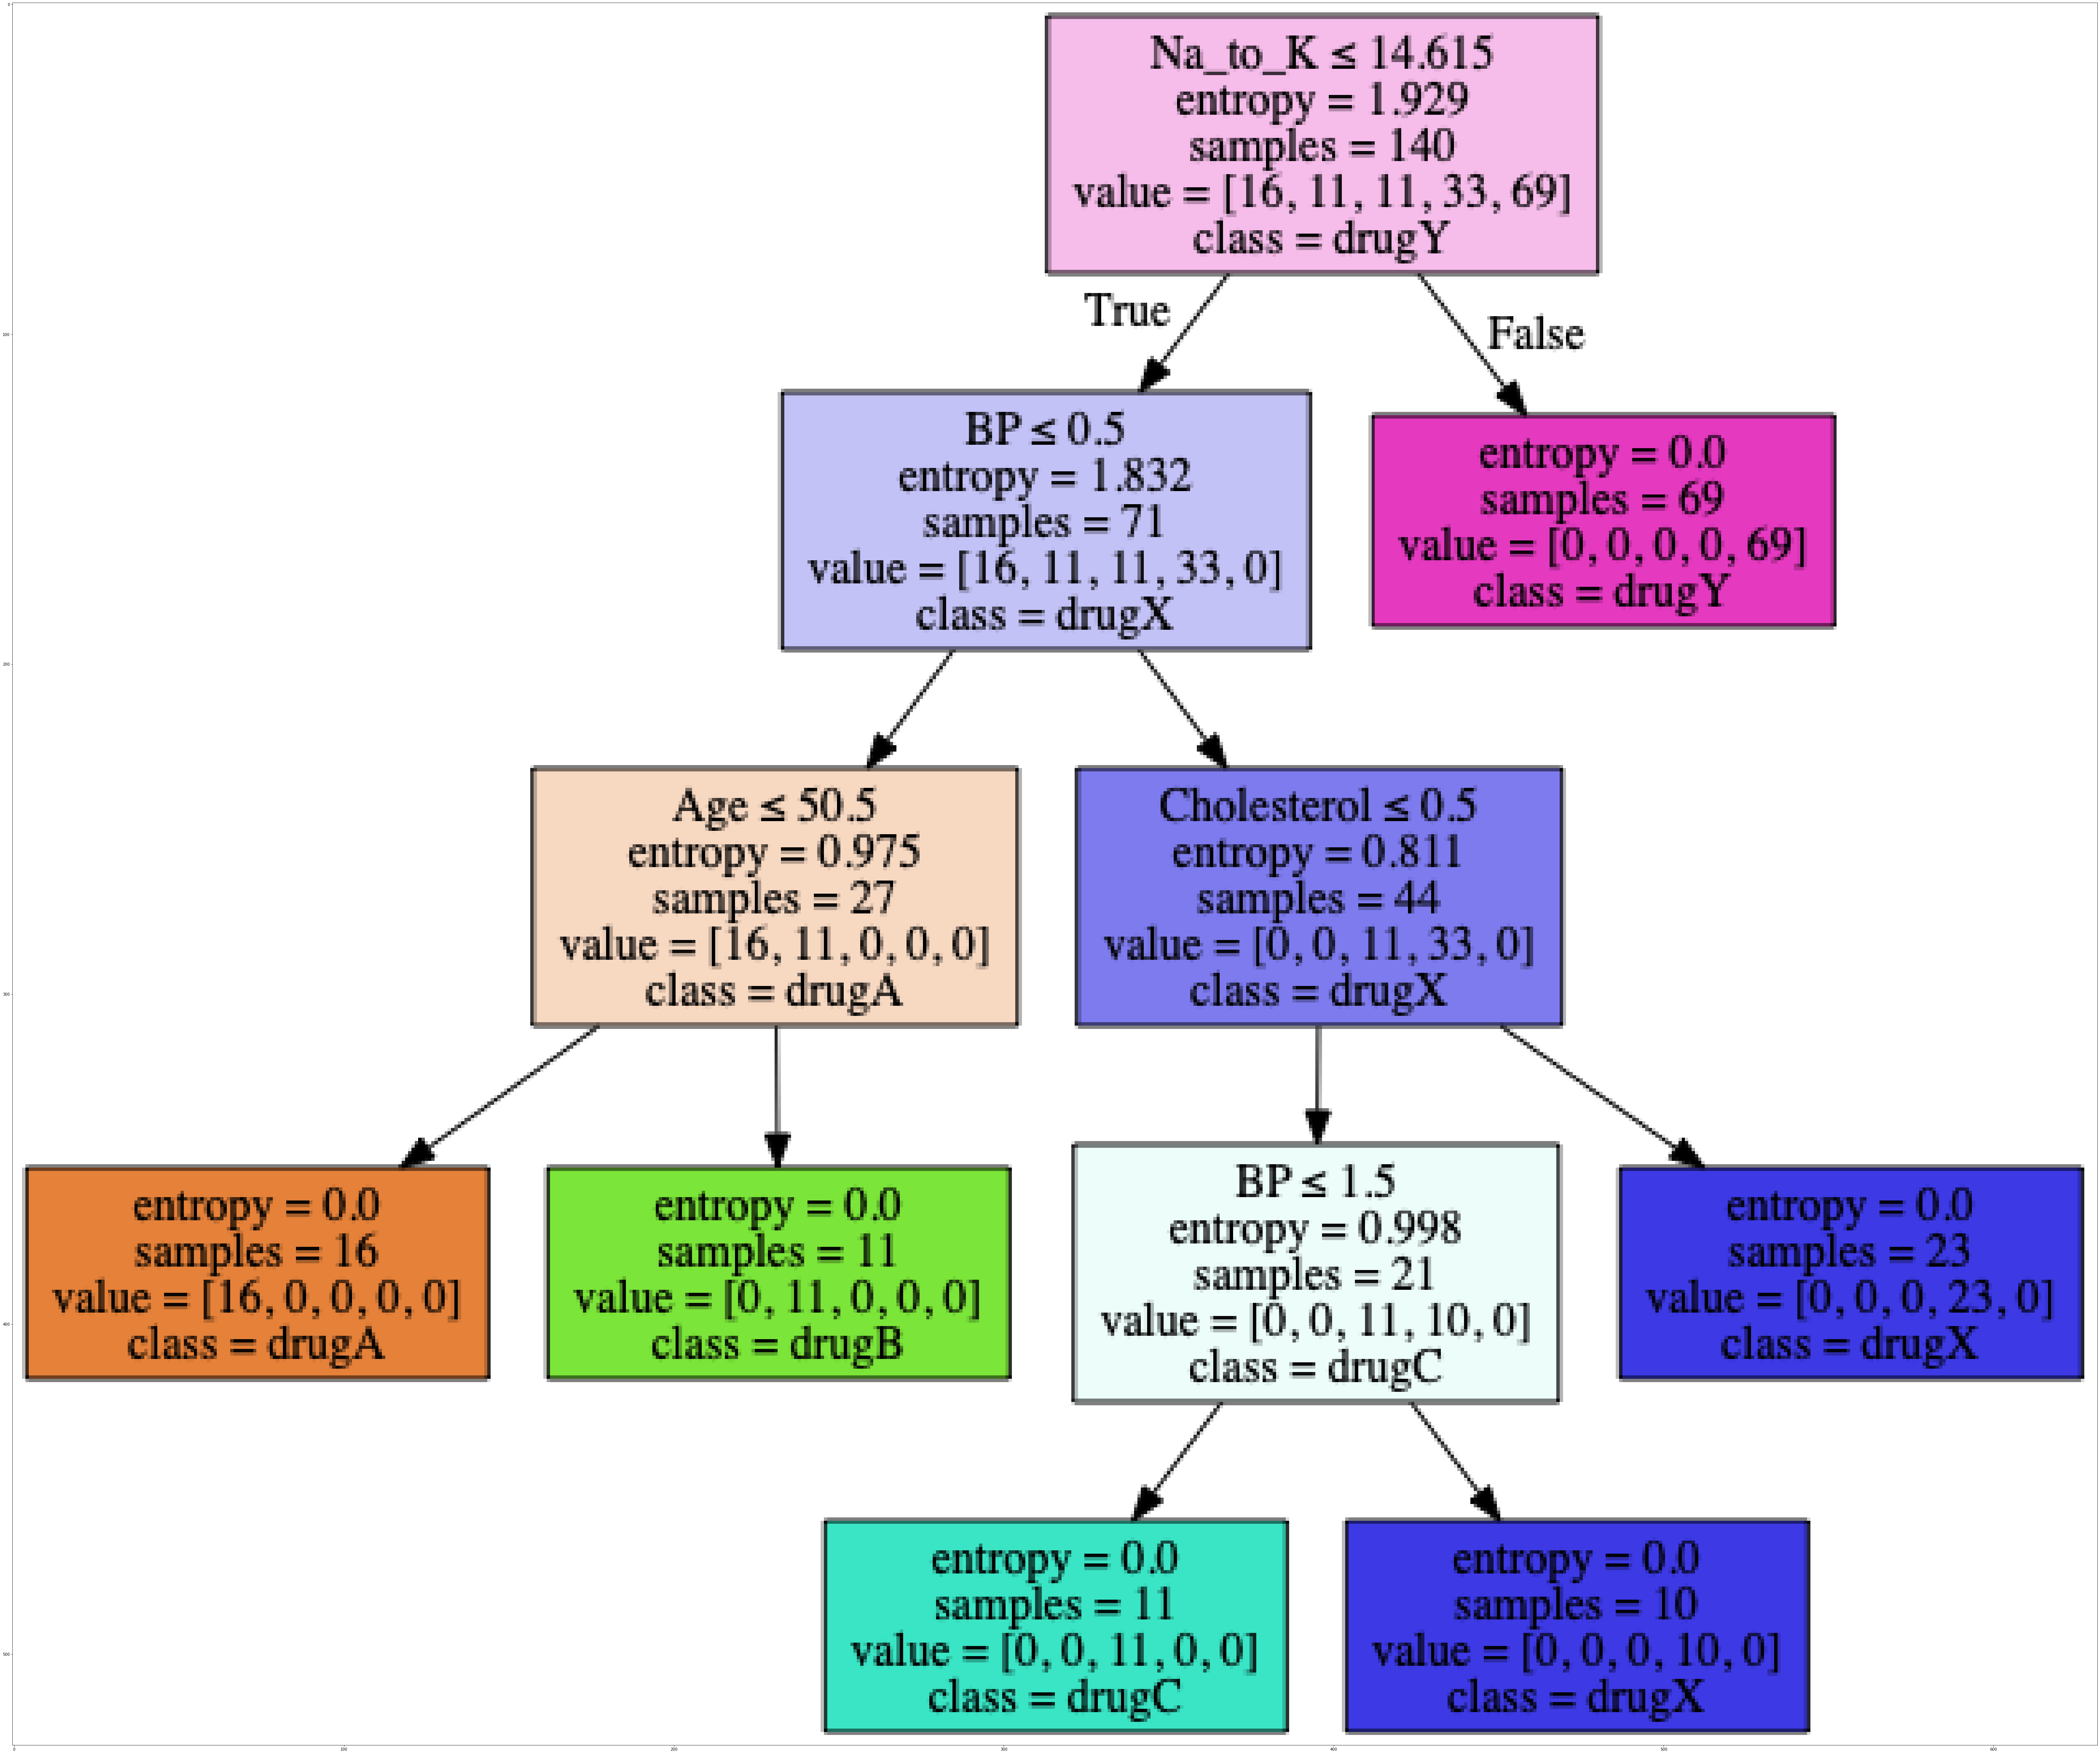

In [128]:
dot_data = StringIO()
filename = "drugtree.png"
feature_names = my_data.columns[0:5]

out=tree.export_graphviz(
    drug_tree,
    feature_names=feature_names, 
    out_file=dot_data, 
    class_names= np.unique(y_train), 
    filled=True, 
    special_characters=True,
    rotate=False
)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save plot as PNG
filename = "drugtree.png"
graph.write_png(filename)

#plot tree retrived from file
plt.figure(figsize=(100, 200))
img = mpimg.imread(filename)
plt.imshow(img,interpolation='nearest')

# Logistic Regression

Main questions to answer:

* What is Logistic regression?
>    * Alg for classification
>    * Similar to Linear Rgression, but LogReg tries to predict a categorical field.
>    * Independent vars must be continous, and dep vars should be transformed into a numerical integer vals.

* What kind of problems can be solved with Logistic Regression?
>    * Pred the prob of a person having a heart attack
>    * Pred mortality of injured patients
>    * Pred customer halt a subscription
>    * Pre likelihood of defaul on a mortgage

* In which stituations we use Logistic Regression?
>    * Data must be binary (0/1, True/False)
>    * If you need the proabbility of your prediction (prob score)
>    * If data linearly separable or with a linear decision boundary (line, plane, or hyperplane)
>    * NOTE: polynomial boundaries can also apply
>    * If need to understand the impact of a feature

Differences between LogReg and LinReg

* What are the drawback of using LinReg as a classifier?
> * Predicted values like 1 or 1000 (very large) may get classified as 1, as it relies in a step function to assign labels.
> * Cannot work out a probability value associated to the predicted label.
> * Logistic classification uses a sigmoid or _logistic function_ (a sort of smooth step function) of predicted values to assign label probabilities.

$$
\sigma(\theta^T X) \textit{ ; }\sigma  = \frac{1}{1 - e^{-\theta^T X}}
$$

Training a LogReg model

* Objective: Change parameters or weights of the model to reduce cost (error or loss function). `Change weight -> Reduce cost`

* Cost function definitionS

\begin{align}
Cost(\hat{y}, y) &= \frac{1}{2}( \hat{y} - y )^2 \\
J(\theta) &= \frac{1}{m} \sum_{i=1}^m Cost(\hat{y}, y) \text{  MSE or Total Error}
\end{align}


* Can find minimum of the cost, but cannot find the global minimum.

SOLUTION: Use a different cost function to approximate the actual cost.

Can use $-log(\hat{y})$, since it mimics the behaviour that we expect as $J$ gets minimised.  

If predicted value equals to ground truth is $y = 1$, the Cost is 0, but if moving y towards 0, then Cost is $\infty$

$$
Cost = -log(\hat{y}); y=1\\
Cost = -log(1 - \hat{y}),; y = 0
$$

* Most popular alg for minimisation: Gradient descent.

Iterative approach to find the minimum of a function.

Summary of training using gradient descent:

* Step 1. Initialised weights or model parameters $\theta$ at random.
* Step 2. Compute the cost function $J(\theta)$ with the training set and given weights.
* Step 3. Compute the gradient the cost too $\nabla J = (\partial_{\theta_i} J)$ (Expensive part of algorithm!)
* Step 4. Update the weight values 

$$
\theta_{new} = \theta_{old} - \eta \nabla J(\theta_{old})
$$

where $-\nabla J$ will give us the direction of fastest change or steepest descent, and $\eta$ (the _learning rate_) will gives additional control on how fast we move on the cost surface. 

* Step 5. Go to Step 2 until cost is small enough.

Finally, we can predict!

## Practical

In [129]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from scipy import optimize
%matplotlib inline

In [135]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.shape

(200, 28)

In [136]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [137]:
#take a subset of features or attributes
feature_set = [
    'tenure',
    'age',
    'address',
    'income',
    'ed',
    'employ',
    'equip',
    'callcard',
    'wireless',
    'churn'
]

churn_df = churn_df[feature_set]
#change 0.0 and 1.0 float format to int
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [138]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

In [139]:
y = np.asarray(churn_df['churn'])

Normalise the dataset

In [140]:
from sklearn import preprocessing

In [141]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [142]:
X

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]])

Tran/Split dataset

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [145]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


Training 

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [148]:
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

__NOTE__: `liblinear` referes to the minimization alg. `C` is a value controlling inverse regularization. [_Regularization_](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a) is a technique used to solve the overfitting problem of machine learning models.

__NOTE__ Other optimization methods include ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’.

Prediction

In [150]:
y_hat = LR.predict(X_test)
y_hat_prob = LR.predict_proba(X_test)

In [151]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [152]:
y_hat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

Evaluation

Using subset accuracy score or J-index

In [153]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat, pos_label=0)

0.7058823529411765

Confusion matrix

In [159]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #decide whether normalise matrix or not
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    #plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    #customize plot
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #print text in boxes
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


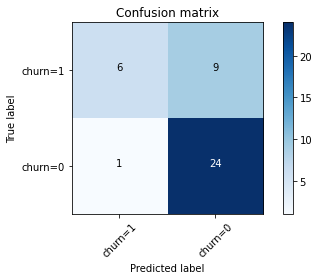

In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [158]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



RECALL:

The F1-score is the geometric mean between the Precision and Recall values.

The _Precision_ is a measure that a class label has been correctly predicted. Hence, equal to `TP/(TP+FP)`

The _Recall_ is the true positive rate `TP/(TP+FN)`

In [161]:
from sklearn.metrics import log_loss

In [163]:
log_loss(y_test, y_hat_prob)

0.6017092478101185

NOTE: The `log_loss` score measures the performance of the classifier when the predicted outputs is a probability values between 0 and 1. 

# Support Vector Machine (SVM)

_What is SVM?_ 

A supervised learning ML model that classifies data by finding a separator. 

_How does it do it?_
* Mapping (transforming) data into a higher-dimensional feature space
* Finding a separator in the new space as a hyperplane 

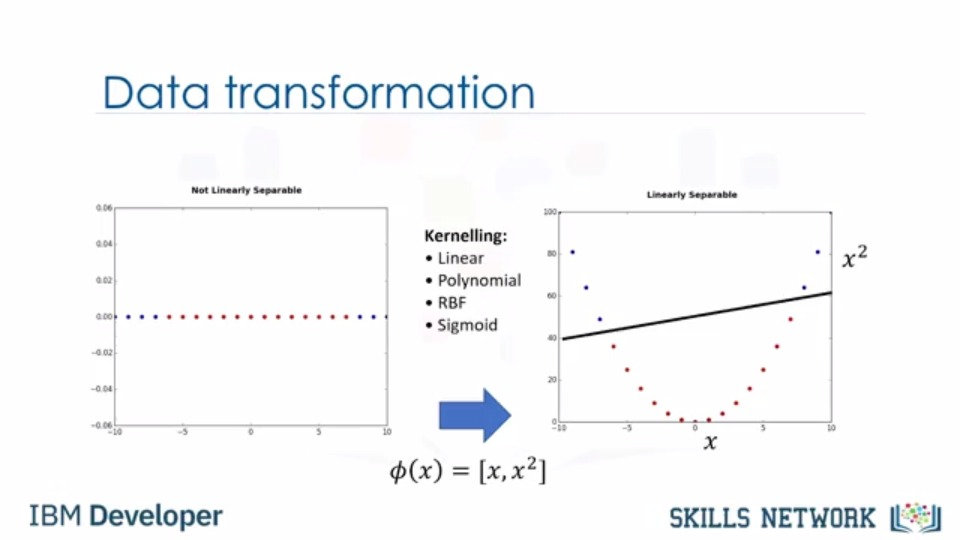

_When can we apply SVM?_

* Applicable when nonlinear boundaries between classes

* Based on the idea of finding a hyperplane that best divides the dataset after being transformed into a high-dimendional space.

* Kernelling (JARGON): mapping data into a higher dimensional space. Typical mathematical forms, usually implemented in libraries.
    * Linear
    * Polynomial
    * RBF ([Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function))
    * Sigmoid 

* In practice, the kernel function cannot be known a priori, so different ker funcs are used and their results are compared. 

_How to find the right separator?_

Find the hyperplane that maximises the separation (or margin) between classes. 
The goal is find a hyperplane with the biggest margin as possible. 

Examples closest to the hyperplane are called _support vectors_.

An optimization procedure is employed to maximize the margin. Can use gradient descent to find the parameters of the hyperline(plane). 

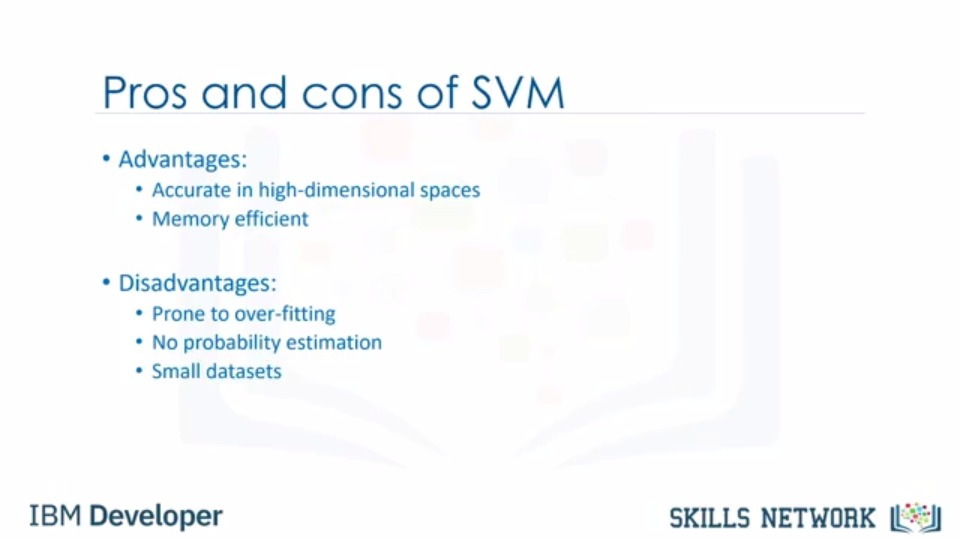

Applications
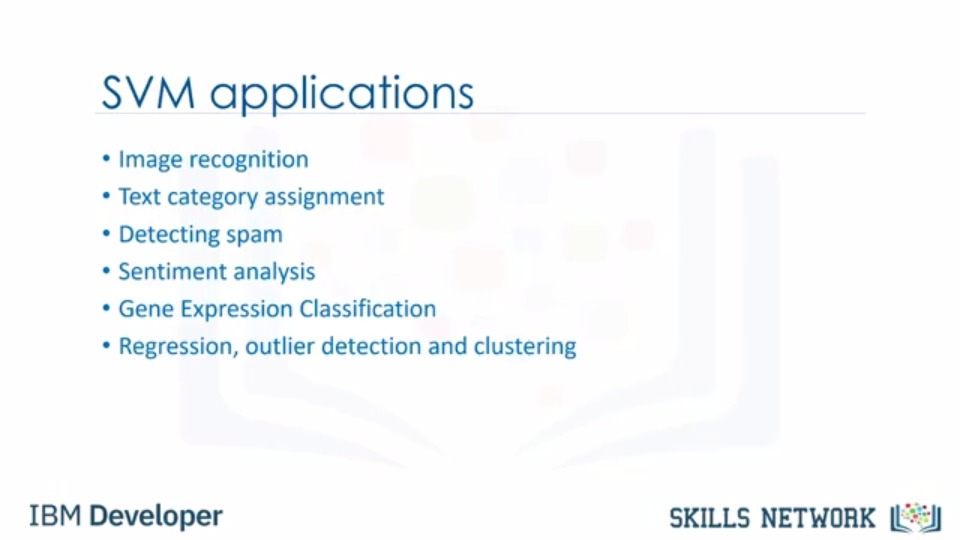

## Practical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cell_samples.csv")

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are __benign (value = 2)__ or __malignant (value = 4)__.

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

Let's filter out data for beningn and malignant cells

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

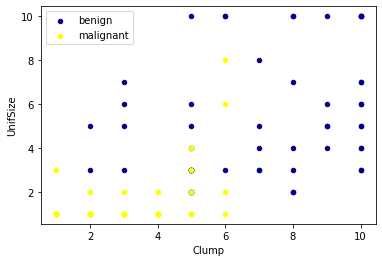

In [4]:
is_malignant = df['Class']==4
is_benign = df['Class']==2

fig,ax = plt.subplots(1,1)

df[is_malignant][:50].plot(
    kind='scatter', 
    x="Clump", 
    y="UnifSize", 
    color="DarkBlue", 
    label="benign",
    ax=ax
)

df[is_benign][:50].plot(
    kind='scatter', 
    x="Clump", 
    y="UnifSize", 
    color="Yellow", 
    label="malignant",
    ax=ax
)

### Preprocessing and selection

Let's have a look at the data first

In [5]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

This column contains values which are not numerical

In [6]:
df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [15]:
#let's identify which rows have non-numerical values
is_numerical = pd.to_numeric(df['BareNuc'], errors="coerce").notnull()
# then, we drop them and redefine df
df = df[is_numerical]
df['BareNuc'] = df['BareNuc'].astype('int')

Then we can veridy that the `BareNuc` attribute is now numerical

In [16]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Let's define the feature set

In [19]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [27]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y[:50]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4])

### Train/Test Splitting

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


### Modelling 

Employ C-Support Vector Classification. Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

The implementation is based on [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/). The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

In [58]:
from sklearn import svm
model = svm.SVC(kernel='rbf')

In [59]:
model.fit(X_train, y_train)

SVC()

In [60]:
y_hat = model.predict(X_test)

### Evaluation 

Visualise confusion matrix

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


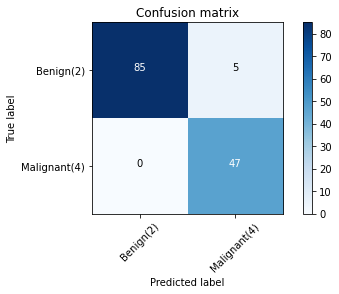

In [63]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_hat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

F1-score

In [64]:
from sklearn.metrics import f1_score
f1_score(y_hat, y_test, average='weighted')

0.9631034010596053

Jaccard subset accuracy score

In [65]:
from sklearn.metrics import jaccard_score

J-score for label 2 (benign)

In [66]:
jaccard_score(y_hat, y_test, pos_label=2)

0.9444444444444444

J-score for label 4 (malignant)

In [67]:
jaccard_score(y_hat, y_test, pos_label=4)

0.9038461538461539

### Practice

Reproduce all the above calculations but for a linear kernelling

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



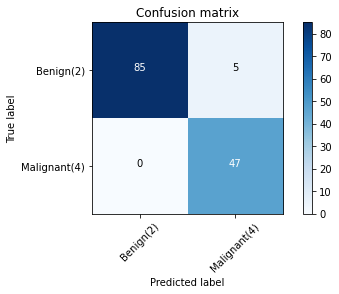

In [77]:
from sklearn import svm
#setup classifier
model = svm.SVC(kernel='linear')

#train classifier
model.fit(X_train, y_train)

#predict labels
y_hat = model.predict(X_test)

#evaluate the model
## plot confusion matrix
data   = (y_test, y_hat)
labels = [2, 4]

cm = confusion_matrix(*data, labels=labels)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(
    cm,
    classes=['Benign(2)','Malignant(4)'],
    normalize= False,  
    title='Confusion matrix'
)

##print classification report
print(classification_report(*data))

In [78]:
from sklearn.metrics import jaccard_score

In [79]:
jaccard_score(y_hat, y_test, pos_label=2)

0.9444444444444444

In [80]:
jaccard_score(y_hat, y_test, pos_label=4)

0.9038461538461539